1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv(r"D:\projects\ML_PRO\notebook\data\stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [7]:
y=df["math_score"]

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

create column transformers with 3 type of transformers

In [9]:

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model Training

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851043
8,AdaBoost Regressor,0.843302
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.732841


In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


In [ ]:
lin_model = LinearRegression(fit_intercept=False)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Initialize DecisionTreeRegressor
tree_model = DecisionTreeRegressor()  

# Train the model
tree_model.fit(X_train, y_train)  

# Make predictions
y_pred = tree_model.predict(X_test)

# Compute R² score
score = r2_score(y_test, y_pred) * 100

print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 72.25


XGBRegressor Models

In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Initialize XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Compute R² score
score = r2_score(y_test, y_pred) * 100

print("Accuracy of the XGBoost model is %.2f" % score)


Accuracy of the XGBoost model is 85.20


RandomForestRegressor Models

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Compute R² score
score = r2_score(y_test, y_pred) * 100

print("Accuracy of the Random Forest model is %.2f" % score)


Accuracy of the Random Forest model is 85.12


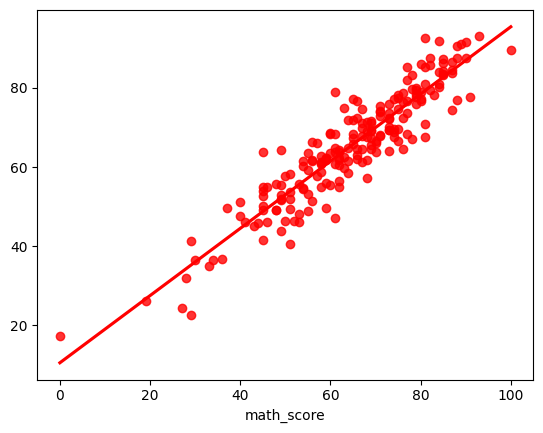

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

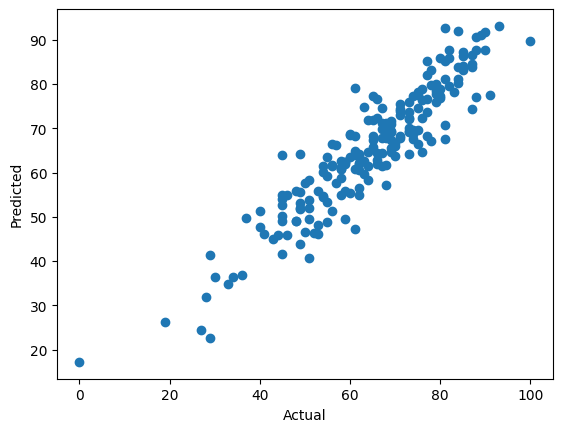

In [23]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

Difference between Actual and Predicted Values

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.58,13.42
737,53,55.80,-2.80
740,80,76.74,3.26
660,74,77.26,-3.26
411,84,80.20,3.80
...,...,...,...
408,52,46.43,5.57
332,62,60.64,1.36
208,74,67.54,6.46
613,65,68.29,-3.29


In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Define hyperparameter grids
param_grids = {
    "Linear Regression": {'fit_intercept': [True, False]},
    "Lasso": {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    "Ridge": {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    "K-Neighbors Regressor": {'n_neighbors': [3, 5, 7, 9]},
    "Decision Tree": {'max_depth': [3, 5, 10, None]},
    "Random Forest Regressor": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    "XGBRegressor": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    "CatBoosting Regressor": {'depth': [6, 8, 10], 'learning_rate': [0.01, 0.1, 0.2]},
    "AdaBoost Regressor": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Store model names and R2 scores
model_list = []
r2_list = []

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Perform hyperparameter tuning if parameters exist
    if model_name in param_grids:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best Parameters: {grid_search.best_params_}")
    else:
        best_model = model.fit(X_train, y_train)  # Train without tuning if no params

    # Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Evaluate model performance
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Store results
    model_list.append(model_name)
    r2_list.append(model_test_r2)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print('Training Performance:')
    print(f"- RMSE: {model_train_rmse:.4f}, MAE: {model_train_mae:.4f}, R2 Score: {model_train_r2:.4f}")
    print('Testing Performance:')
    print(f"- RMSE: {model_test_rmse:.4f}, MAE: {model_test_mae:.4f}, R2 Score: {model_test_r2:.4f}")
    print("="*40, "\n")

# Create DataFrame of model performances
import pandas as pd
results_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)
print(results_df)


Training Linear Regression...
Best Parameters: {'fit_intercept': False}
Model: Linear Regression
Training Performance:
- RMSE: 5.3231, MAE: 4.2667, R2 Score: 0.8743
Testing Performance:
- RMSE: 5.3940, MAE: 4.2148, R2 Score: 0.8804

Training Lasso...
Best Parameters: {'alpha': 0.001}
Model: Lasso
Training Performance:
- RMSE: 5.3231, MAE: 4.2667, R2 Score: 0.8743
Testing Performance:
- RMSE: 5.3930, MAE: 4.2137, R2 Score: 0.8805

Training Ridge...
Best Parameters: {'alpha': 1}
Model: Ridge
Training Performance:
- RMSE: 5.3233, MAE: 4.2650, R2 Score: 0.8743
Testing Performance:
- RMSE: 5.3904, MAE: 4.2111, R2 Score: 0.8806

Training K-Neighbors Regressor...
Best Parameters: {'n_neighbors': 9}
Model: K-Neighbors Regressor
Training Performance:
- RMSE: 6.0026, MAE: 4.8003, R2 Score: 0.8402
Testing Performance:
- RMSE: 7.1533, MAE: 5.5817, R2 Score: 0.7897

Training Decision Tree...
Best Parameters: {'max_depth': 5}
Model: Decision Tree
Training Performance:
- RMSE: 5.7173, MAE: 4.6396, R2

In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best model
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb.predict(X_test)

# Evaluate performance
score = r2_score(y_test, y_pred) * 100

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Optimized XGBoost Model Accuracy: {score:.2f}%")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Optimized XGBoost Model Accuracy: 86.78%


In [1]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Extended hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 500],  # More trees
    'learning_rate': [0.01, 0.05, 0.1],  # Smaller learning rates
    'max_depth': [3, 5, 7, 9],  # Deeper trees
    'subsample': [0.7, 0.8, 0.9],  # Data sampling
    'colsample_bytree': [0.8, 1.0],  # Feature sampling
    'gamma': [0, 0.1, 0.2, 0.3],  # Tree pruning
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 Regularization
    'reg_lambda': [1, 2, 5, 10]  # L2 Regularization
}

# Perform Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best model
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb.predict(X_test)

# Evaluate performance
score = r2_score(y_test, y_pred) * 100

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Optimized XGBoost Model Accuracy: {score:.2f}%")


NameError: name 'X_train' is not defined

In [ ]:
import pandas as pd

# Create DataFrame for predictions
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})

# Display the DataFrame
pred_df


,Actual Value,Predicted Value,Difference
521,91,75.158218,15.841782
737,53,56.634945,-3.634945
740,80,77.917580,2.082420
660,74,76.477501,-2.477501
411,84,86.046944,-2.046944
...,...,...,...
408,52,46.879017,5.120983
332,62,61.680328,0.319672
208,74,69.156876,4.843124
613,65,67.948761,-2.948761
